In [ ]:
NAME : Pratik Vijay Bhagyawant\ 
CLASS : TE-AI&DS\
ROLL No : 2437016\
Batch : A\
SUB : Software Laboratory II (Artificial Neural Network)

In [ ]:
Problem Statement :\
Write Python program to implement CNN object detection. Discuss numerous performance
evaluation metrics for evaluating the object detecting algorithms' performance.

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0

In [3]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10)
])

C:\Users\ok\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [5]:
history = model.fit(train_images, train_labels, epochs=5, 
                    validation_data=(test_images, test_labels))

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 23s 13ms/step - accuracy: 0.3572 - loss: 1.7322 - val_accuracy: 0.5560 - val_loss: 1.2300
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.5764 - loss: 1.1852 - val_accuracy: 0.6271 - val_loss: 1.0631
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.6446 - loss: 1.0143 - val_accuracy: 0.6722 - val_loss: 0.9487
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.6844 - loss: 0.9032 - val_accuracy: 0.6843 - val_loss: 0.8990
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.7099 - loss: 0.8352 - val_accuracy: 0.7002 - val_loss: 0.8785


In [6]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 1s - 4ms/step - accuracy: 0.7002 - loss: 0.8785

Test accuracy: 0.7002000212669373


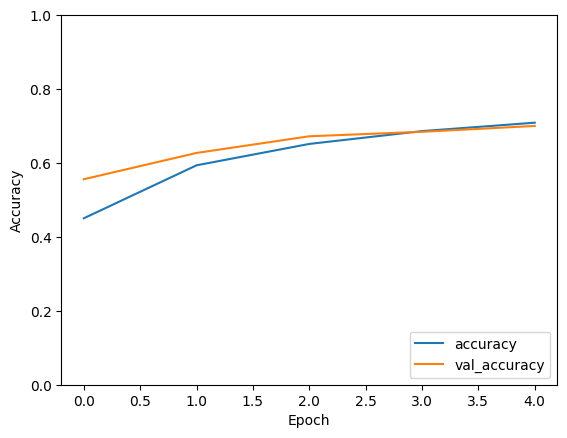

In [7]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

In [8]:
y_pred = model.predict(test_images)
y_pred_classes = [np.argmax(element) for element in y_pred]

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


<Axes: >

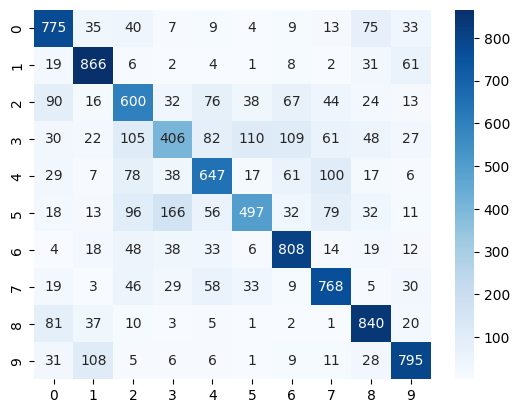

In [9]:
conf_matrix = confusion_matrix(test_labels, y_pred_classes)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')

In [10]:
print(classification_report(test_labels, y_pred_classes))

              precision    recall  f1-score   support

           0       0.71      0.78      0.74      1000
           1       0.77      0.87      0.82      1000
           2       0.58      0.60      0.59      1000
           3       0.56      0.41      0.47      1000
           4       0.66      0.65      0.65      1000
           5       0.70      0.50      0.58      1000
           6       0.73      0.81      0.76      1000
           7       0.70      0.77      0.73      1000
           8       0.75      0.84      0.79      1000
           9       0.79      0.80      0.79      1000

    accuracy                           0.70     10000
   macro avg       0.69      0.70      0.69     10000
weighted avg       0.69      0.70      0.69     10000

